# Transverse Emittance Measurements in MEBT

----

## 1. Perform a MEBT quad (you choose) field gradient scan measuring the RMS transverse beam size with one Wire Scanner

Scan `MEBT_Mag:QH01` field while measure RMS beam X size
Fit the curve for emmitance estimation.

Total transfer matrix of interest here is $R=SQ$, where $S$ denotes the known transfer matrix between quadrupole and the wire, and $Q$ is the transfer matrix of the quadrupole:
$$
Q = 
\begin{pmatrix}
1 & 0 \\
K & 1
\end{pmatrix}
$$

Scan field strength $K$, measure beam size as a function of $K$.
$$
\epsilon_x = \frac{\sqrt{AC}}{S_{12}^2}
$$

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Scaning with 30 steps, we found minimum RMS X beam size.

Text(0, 0.5, 'X RMS Size')

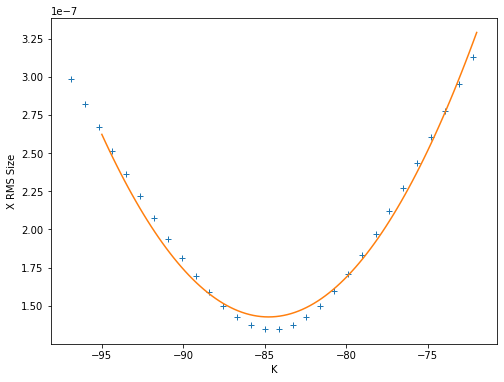

In [65]:
# Note wire scanners report in mm!
dat = np.loadtxt('data.txt')
x = dat[:,0]; y = dat[:,1]/1e3
z = np.polyfit(x,y,2)
p = np.poly1d(z)
xp = np.linspace(-95, -72, 100)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y,'+')
ax.plot(xp, p(xp))
ax.set_xlabel('K')
ax.set_ylabel('X RMS Size')

In simulation $M_{wqs}(1,2)$ also changes slightly.

Text(0, 0.5, 'S12')

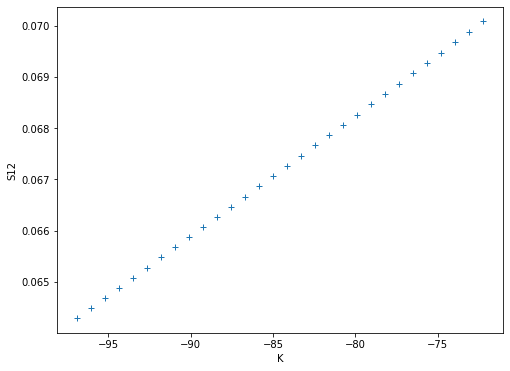

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dat[:,2],'+')
ax.set_xlabel('K')
ax.set_ylabel('S12')

In [79]:
B = np.roots(z)[0].real
C = p(B)
A = z[0]
s12 = dat[:,2].mean()
print('A: {:.3e} B: {:.3f} C: {:.3e} S12: {:.3f}'.format(A,B,C,s12))

A: 1.142e-09 B: -84.770 C: 1.427e-07 S12: 0.067


## 2.a Emittance from RMS size vs. gradient curve

In [72]:
emit = np.sqrt(A*C)/s12**2
print('Emittance: {:.3e} [pi*m*rad]'.format(emit))

Emittance: 2.830e-06 [pi*m*rad]


$$
\bar\epsilon_{RMS} = 2.839 \,\text{pi*mm*mrad}
$$

## 2.b Emittance from weighted LSQ

$$
\bar\epsilon_{RMS} = 2.9767 \,\text{pi*mm*mrad}
$$

## Transport matrix between quadrupole and wire scanner:

* Response matrix from start to quadrupole $R_{q}$

```python
    state = traj.stateForElement(quad.getId())
    quad_mtrx = state.getResponseMatrix()
```

* Response matrix from start to wire scanner $R_{w}$

```python
    state = traj.stateForElement(ws.getId())
    ws_mtrx = state.getResponseMatrix()
```

* Transport matrix from quadrupole to wire scanner $M_{qw}$
$$
    M_{qw} R_q = R_w\\
    M_{qw} =  R_w R_q^{-1}
$$

```python
    mtrx_s7 = ws_mtrx.times(quad_mtrx.inverse())
```

  This is a $7\times 7$ matrix, where we care about the $x, x'$ elements.
  
  $$
  M_{wqx} = 
  \begin{pmatrix}
  M_{wq}(0,0) & M_{wq}(0,1) \\
  M_{wq}(1,0) & M_{wq}(1,1)
  \end{pmatrix}
  $$



* Energy spread measurement from transport matrix $M_{wqx}$ by $n$ measurements: (ignore $\delta$ due to no kickers/correctors)

  $$
    \Sigma = M V
  $$

  $$ 
  \begin{pmatrix}
      \langle x_1^2 \rangle \\
      \vdots \\
      \langle x_n^2 \rangle  
  \end{pmatrix} = 
  \begin{pmatrix}
      m_{00}^2[0] & 2m_{00}[0]m_{01}[0] & m_{02}^2[0] \\
      \vdots & \vdots & \vdots \\
      m_{00}^2[n] & 2m_{00}m_{01}[n] & m_{02}^2[n]
  \end{pmatrix}
  \begin{pmatrix}
      \langle x_0^2 \rangle \\
      \langle x_0{x'}_0 \rangle \\
      \langle {x'}_0^2 \rangle
  \end{pmatrix}
  $$
  
  where $m_{ij}[n]$ is element from $M_{qws}$ at $n$ measurement, and $\Sigma(n)=\langle x_n^2 \rangle$ can be measured by:
  ```python
  xRMS = state.twissParameters()[0].getEnvelopeRadius()
  ```
  
* Solve to get $V$ using weighted least squares:

$$
V = (M^T W M)^{-1}M^T W \Sigma
$$

  where the errors are defined by:
  $$
  E = (M^T W M)^{-1}
  $$
  
## Emittance errors:
$$
\epsilon_{RMS} = \bar\epsilon \pm \frac{1}{2}\frac{\sqrt{\sigma_{\epsilon_{RMS}^2}^2}}{\bar\epsilon}
$$

Result: 0.00553 pi*mm*mrad